In [ ]:
%matplotlib inline

import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

### 1. Load MNIST data
  - 55,000/10,000/5,000 points for train/val/test
  - images 
      - mnist.\*.images (\* $\in$ train, validation, test)
      - size: (1, 28*28)
  - labels
      - mnist.\*.labels (\* $\in$ train, validation, test)
      - one-hot vector (1, 10)

In [6]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


#### MNIST 데이터 확인

In [3]:
# print size of images and labels
print('image size: ', mnist.train.images.shape)
print('label size: ', mnist.train.labels.shape)

image size:  (55000, 784)
label size:  (55000, 10)


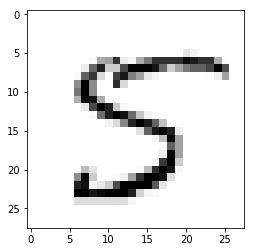

label: [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
label: 5


In [7]:
idx = random.randint(0, mnist.train.images.shape[0])
img = mnist.train.images[idx, :]
label = mnist.train.labels[idx, :]
img = img.reshape(28,28)

plt.imshow(img, cmap=plt.cm.Greys)
plt.show()
print('label: {}'.format(label))
print('label: {}'.format(np.argmax(label)))

### 2. Single-layer NN
 - Network
     - $\hat{y}= \text{softmax}(W^Tx+b)$
 - Loss function
     - Cross-entropy loss
     - $-\sum_k{y_{i,k}\log{\hat{y}_{i,k}}}$
 - Optimization algorithm
     - 실제 레이블 y를 예측하도록 하는 W와 b를 찾음
     - gradient descent
         - $\theta = \theta -lr * d\theta~~$ where $\theta \in W,b$
 - 약 92%의 성능이 나옴

In [1]:
img = Image.open("../resource/single_layer_NN.png")
plt.imshow(img)
plt.axis("off"); plt.show()

NameError: name 'Image' is not defined

In [3]:
""" 인풋 데이터 및 레이블 정의
  인풋 데이터를 받기 위해 tensorflow placeholder를 만들고, 
  그 크기는 [batch_size, 데이터 크기]로 정의합니다. 또한, 
  인풋 데이터의 레이블을 받기 위해 [batch_size, 레이블 수]
  크기의 placeholder를 정의합니다.
  note: 여기에서 batch_size는 None으로 둠으로 임의의
  batch_size의 데이터를 인풋으로 받게 됩니다.
"""
inps = tf.placeholder(tf.float32, [None, 784])
labels = tf.placeholder(tf.float32, [None, 10])

In [4]:
""" softmax regressor 모델 정의
  y = softmax(Wx + b)의 연산을 수행하는 모델을 정의합니다.
"""
W = tf.Variable(tf.zeros([784, 10])) # weight
b = tf.Variable(tf.zeros([10]))      # bias

pred = tf.nn.softmax( tf.matmul(inps, W) + b ) # softmax(W*x + b)

In [39]:
""" loss 및 optimizer 정의
  cross-entropy loss를 정의하고, gradient descent 방법으로 
  loss가 작아지도록 모델을 업데이트하는 optimizer를 정의합니다.  
"""
cross_entropy = tf.reduce_mean(-tf.reduce_sum(labels * tf.log(pred), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

In [40]:
""" 정확도 정의
  정확도 = 맞춘 데이터 수 / 전체 데이터 수
"""
# 예측한 레이블과 실제 레이블이 같은 데이터의 수를 계산
correct_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [41]:
""" 모델 학습
  정의한 모델을 실제로 tensoerflow의 session에서 
  forward/backward를 수행하고 모델의 파라미터를 업데이트합니다.
"""
batch_size = 100
total_batch = int(mnist.train.num_examples/batch_size)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    # epoch: training 데이터 전체를 다 보는 경우를 의미
    # 아래의 경우 10 epoch 동안 모델을 학습함
    for epoch in range(10):
        total_cost = 0

        # iteration (i): 하나의 batch를 보는 경우를 의미
        for i in range(total_batch):
            # batch 데이터를 가져옴
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # 모델 업데이트 수행
            # sess.run(수행하고자 하는 연산, 연산을 수행하기 위해 요구되는 placeholder를 제공)
            _, cost_val = sess.run([train_step, cross_entropy], \
                                   feed_dict={inps: batch_xs, labels: batch_ys})
            total_cost += cost_val

        print( "Epoch:", "%04d" % (epoch + 1), \
            "Avg. cost =", '{:.3f}'.format(total_cost / total_batch))

    # 테스트 데이터에 대한 정확도
    print("Test Accuracy: ", sess.run(accuracy, \
                    feed_dict={inps: mnist.test.images, labels: mnist.test.labels}))

Epoch: 0001 Avg. cost = 0.676
Epoch: 0002 Avg. cost = 0.417
Epoch: 0003 Avg. cost = 0.375
Epoch: 0004 Avg. cost = 0.353
Epoch: 0005 Avg. cost = 0.340
Epoch: 0006 Avg. cost = 0.330
Epoch: 0007 Avg. cost = 0.323
Epoch: 0008 Avg. cost = 0.316
Epoch: 0009 Avg. cost = 0.312
Epoch: 0010 Avg. cost = 0.307
Test Accuracy:  0.9169


### Note!!
  - learning rate 바꿔서 학습해보기 [0.99, 0.9, 0.1, 0.05, 0.01, 0.005, 0.001]
  - 10 epoch 학습 시 정확도 아래값과 유사한지 확인
    - [0.9215, 0.9251, 0.921, 0.9195, 0.903, 0.8914, 0.8537]
  - learning rate가 낮으면 같은 epoch 대비 모델 업데이트를 적게함으로 학습 속도가 느려짐을 확인할 수 있음 (epoch 수를 늘려 최종 성능도 확인해봅시다)
  - 모델을 빠르게 학습하고, 높은 성능을 위해서는 learning rate를 잘 선택하는 것이 중요